<a href="https://colab.research.google.com/github/smartie20/smartie20/blob/main/FINAL__PROJECT.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#LABS IMPORTION

In [ ]:
import tensorflow as tf 
import numpy as np 
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
from sklearn import metrics,model_selection,preprocessing
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import plot_confusion_matrix

#DATASET READING AND EDITING


In [ ]:
data = pd.read_csv('/content/Video_games_esrb_rating.csv')
data = pd.DataFrame(data)
data

,title,console,alcohol_reference,animated_blood,blood,blood_and_gore,cartoon_violence,crude_humor,drug_reference,fantasy_violence,intense_violence,language,lyrics,mature_humor,mild_blood,mild_cartoon_violence,mild_fantasy_violence,mild_language,mild_lyrics,mild_suggestive_themes,mild_violence,no_descriptors,nudity,partial_nudity,sexual_content,sexual_themes,simulated_gambling,strong_janguage,strong_sexual_content,suggestive_themes,use_of_alcohol,use_of_drugs_and_alcohol,violence,esrb_rating
0,Monster Jam Steel Titans 2,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,E
1,Subnautica: Below Zero,1,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,ET
2,NIER REPLICANT VER.1.22474487139…,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0,0,0,M
3,Jamestown+,0,0,0,0,0,0,0,0,1,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,ET
4,Neptunia Virtual Stars,0,0,0,0,0,0,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,T
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1890,SENRAN KAGURA Peach Beach Splash,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,0,1,0,0,0,0,0,M
1891,Sneaky Bears,0,0,0,0,0,0,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,T
1892,SPARC,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,E
1893,Still Time,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,T


##GET RID OF UNWANTED COLUMNS

In [ ]:
data.drop('title',axis=1,inplace=True)
data

,console,alcohol_reference,animated_blood,blood,blood_and_gore,cartoon_violence,crude_humor,drug_reference,fantasy_violence,intense_violence,language,lyrics,mature_humor,mild_blood,mild_cartoon_violence,mild_fantasy_violence,mild_language,mild_lyrics,mild_suggestive_themes,mild_violence,no_descriptors,nudity,partial_nudity,sexual_content,sexual_themes,simulated_gambling,strong_janguage,strong_sexual_content,suggestive_themes,use_of_alcohol,use_of_drugs_and_alcohol,violence,esrb_rating
0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,E
1,1,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,ET
2,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0,0,0,M
3,0,0,0,0,0,0,0,0,1,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,ET
4,0,0,0,0,0,0,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,T
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1890,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,0,1,0,0,0,0,0,M
1891,0,0,0,0,0,0,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,T
1892,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,E
1893,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,T


##CHECKING FOR NULLS/MISSING VALUES

In [ ]:
print('Feature name | Total missing values')
print(data.isna().sum())

Feature name | Total missing values
console                     0
alcohol_reference           0
animated_blood              0
blood                       0
blood_and_gore              0
cartoon_violence            0
crude_humor                 0
drug_reference              0
fantasy_violence            0
intense_violence            0
language                    0
lyrics                      0
mature_humor                0
mild_blood                  0
mild_cartoon_violence       0
mild_fantasy_violence       0
mild_language               0
mild_lyrics                 0
mild_suggestive_themes      0
mild_violence               0
no_descriptors              0
nudity                      0
partial_nudity              0
sexual_content              0
sexual_themes               0
simulated_gambling          0
strong_janguage             0
strong_sexual_content       0
suggestive_themes           0
use_of_alcohol              0
use_of_drugs_and_alcohol    0
violence                    0
esrb

In [ ]:
print(data.isnull().sum())

console                     0
alcohol_reference           0
animated_blood              0
blood                       0
blood_and_gore              0
cartoon_violence            0
crude_humor                 0
drug_reference              0
fantasy_violence            0
intense_violence            0
language                    0
lyrics                      0
mature_humor                0
mild_blood                  0
mild_cartoon_violence       0
mild_fantasy_violence       0
mild_language               0
mild_lyrics                 0
mild_suggestive_themes      0
mild_violence               0
no_descriptors              0
nudity                      0
partial_nudity              0
sexual_content              0
sexual_themes               0
simulated_gambling          0
strong_janguage             0
strong_sexual_content       0
suggestive_themes           0
use_of_alcohol              0
use_of_drugs_and_alcohol    0
violence                    0
esrb_rating                 0
dtype: int

#TARGETS/FEATURES SPECIFICATION

In [ ]:
x=data.iloc[:,:32]

In [ ]:
x

,console,alcohol_reference,animated_blood,blood,blood_and_gore,cartoon_violence,crude_humor,drug_reference,fantasy_violence,intense_violence,language,lyrics,mature_humor,mild_blood,mild_cartoon_violence,mild_fantasy_violence,mild_language,mild_lyrics,mild_suggestive_themes,mild_violence,no_descriptors,nudity,partial_nudity,sexual_content,sexual_themes,simulated_gambling,strong_janguage,strong_sexual_content,suggestive_themes,use_of_alcohol,use_of_drugs_and_alcohol,violence
0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0
1,1,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0
2,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0,0,0
3,0,0,0,0,0,0,0,0,1,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1890,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,0,1,0,0,0,0,0
1891,0,0,0,0,0,0,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1892,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0
1893,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


In [ ]:
y=data['esrb_rating']

In [ ]:
y

0        E
1       ET
2        M
3       ET
4        T
        ..
1890     M
1891     T
1892     E
1893     T
1894     E
Name: esrb_rating, Length: 1895, dtype: object

In [ ]:
#we used mapping to convert the string values to numric values , making it learnable with models 
mapping = { 'E' : 0,
  'ET': 1,
  'T' : 2,
  'M' : 3,
} 

In [ ]:
y=y.map(mapping)
y

0       0
1       1
2       3
3       1
4       2
       ..
1890    3
1891    2
1892    0
1893    2
1894    0
Name: esrb_rating, Length: 1895, dtype: int64

#DOING SOME NECESSARIES

In [ ]:
#defining estimators function with a array to save the models after learning for bars chart ploting 
def print_estimator_name(estimator):
    return estimator.__class__.__name__

In [ ]:
estimators=[] #estimators array
classifiers = [] #classifiers array to save classification models for confusion matrices ploting
scores = [] #scores array for saveing presicion and recall results for comparing
acc=[] #saving accuracy scores for bars chart ploting
f1=[] #saveing f1 score for bars chart ploting

#TRAIN - TEST SPLITING USING KFOLD METHOD

In [ ]:
def kfold_train_test_split(x, y, train_indices, test_indices):
  return x.iloc[train_indices], x.iloc[test_indices], y.iloc[train_indices], y.iloc[test_indices] #we used iloc to specify indices for each partition

In [ ]:
x.reset_index(drop=True)
y.reset_index(drop=True)

0       0
1       1
2       3
3       1
4       2
       ..
1890    3
1891    2
1892    0
1893    2
1894    0
Name: esrb_rating, Length: 1895, dtype: int64

In [ ]:
k_fold = model_selection.KFold(n_splits=5)

In [ ]:
for train_indices, test_indices in k_fold.split(x):
  x_train, x_test, y_train, y_test = kfold_train_test_split(x, y, train_indices, test_indices)

#PREPROCESSING

In [ ]:
x_train=tf.keras.utils.normalize(x_train,axis=1)
x_test=tf.keras.utils.normalize(x_test,axis=1)
y_train_hot=tf.one_hot(y_train,depth=len(set(y_train)))
y_test_hot=tf.one_hot(y_test,depth=len(set(y_train)))

#MODELS SELECTION

##1ST MODEL DEEP NEURAL NETWORK

In [ ]:
dnn_model=tf.keras.models.Sequential([
                                  tf.keras.layers.Flatten(),
                                  tf.keras.layers.Dense(units=256,activation=tf.nn.leaky_relu,kernel_initializer=tf.initializers.he_uniform(seed=42),name='layer_1'),
                                  tf.keras.layers.Dropout(0.1),
                                  tf.keras.layers.Dense(units=256,activation=tf.nn.leaky_relu,kernel_initializer=tf.initializers.he_uniform(seed=42),name='layer_2'),
                                  tf.keras.layers.Dropout(0.1),
                                  tf.keras.layers.Dense(units=10,activation=tf.nn.softmax,name='output')
                                  ])

In [ ]:
dnn_model.compile(optimizer=tf.optimizers.Adam(),loss=tf.losses.sparse_categorical_crossentropy,metrics=['accuracy'])

In [ ]:
#shapes checking before training
x_train.shape

(1516, 32)

In [ ]:
x_test.shape

(379, 32)

In [ ]:
dnn_model.fit(x=x_train,y=y_train,batch_size=32,epochs=8,verbose=1,validation_data=(x_test,y_test))

Epoch 1/8
48/48 [==============================] - 1s 7ms/step - loss: 0.9358 - accuracy: 0.6979 - val_loss: 0.4152 - val_accuracy: 0.8417
Epoch 2/8
48/48 [==============================] - 0s 3ms/step - loss: 0.4449 - accuracy: 0.8199 - val_loss: 0.3493 - val_accuracy: 0.8707
Epoch 3/8
48/48 [==============================] - 0s 4ms/step - loss: 0.4013 - accuracy: 0.8351 - val_loss: 0.3278 - val_accuracy: 0.8786
Epoch 4/8
48/48 [==============================] - 0s 3ms/step - loss: 0.3593 - accuracy: 0.8489 - val_loss: 0.3085 - val_accuracy: 0.8760
Epoch 5/8
48/48 [==============================] - 0s 3ms/step - loss: 0.3527 - accuracy: 0.8555 - val_loss: 0.3017 - val_accuracy: 0.8707
Epoch 6/8
48/48 [==============================] - 0s 3ms/step - loss: 0.3408 - accuracy: 0.8588 - val_loss: 0.2962 - val_accuracy: 0.8760
Epoch 7/8
48/48 [==============================] - 0s 3ms/step - loss: 0.3305 - accuracy: 0.8681 - val_loss: 0.2845 - val_accuracy: 0.8813
Epoch 8/8
48/48 [==========

In [ ]:
pred=dnn_model.predict(x_test)
tf.argmax(pred,axis=-1)

<tf.Tensor: shape=(379,), dtype=int64, numpy=
array([3, 2, 1, 1, 2, 2, 2, 1, 1, 0, 0, 2, 0, 0, 2, 3, 2, 2, 3, 3, 2, 2,
       1, 3, 2, 2, 1, 2, 2, 3, 0, 1, 2, 0, 2, 3, 2, 2, 2, 2, 3, 0, 0, 0,
       1, 1, 2, 0, 0, 2, 1, 3, 1, 0, 2, 1, 0, 3, 0, 1, 2, 1, 2, 3, 1, 3,
       2, 0, 0, 0, 1, 1, 2, 2, 0, 2, 3, 1, 1, 3, 1, 1, 0, 3, 0, 1, 1, 0,
       0, 2, 0, 0, 3, 0, 1, 2, 2, 3, 0, 1, 2, 1, 3, 1, 1, 2, 2, 1, 2, 2,
       0, 0, 1, 2, 0, 2, 2, 0, 2, 2, 0, 2, 0, 2, 2, 3, 3, 2, 2, 0, 0, 2,
       3, 1, 1, 2, 1, 0, 1, 0, 2, 2, 1, 0, 2, 0, 2, 3, 0, 2, 2, 2, 2, 0,
       1, 3, 3, 3, 2, 2, 2, 0, 2, 0, 2, 1, 3, 2, 1, 0, 2, 1, 2, 0, 3, 2,
       2, 2, 1, 1, 2, 1, 1, 3, 1, 2, 0, 2, 2, 3, 3, 1, 3, 2, 2, 1, 0, 0,
       0, 1, 2, 1, 2, 1, 3, 2, 0, 1, 0, 2, 2, 0, 3, 0, 0, 2, 1, 2, 3, 1,
       2, 0, 1, 3, 1, 1, 2, 3, 2, 1, 2, 1, 2, 2, 0, 1, 2, 0, 1, 2, 2, 1,
       0, 0, 0, 3, 2, 2, 1, 2, 3, 2, 0, 0, 3, 0, 0, 2, 3, 2, 2, 0, 2, 2,
       0, 3, 1, 0, 3, 2, 2, 2, 2, 0, 1, 2, 2, 3, 3, 2, 0, 0, 0, 1, 3, 3,
     

###RESULTS AND SCORES MONITORING

In [ ]:
accuracy =metrics.accuracy_score(y_test,np.argmax(pred,-1))
precision =metrics.precision_score(y_test,np.argmax(pred,-1),average='weighted')
recall =metrics.recall_score(y_test,np.argmax(pred,-1),average='weighted')
f1_score =metrics.f1_score(y_test,np.argmax(pred,-1),average='weighted')

In [ ]:
print('accuracy',accuracy)
print('precision',precision)
print('recall',recall)
print('f1_score',f1_score)

accuracy 0.8865435356200527
precision 0.890938229707481
recall 0.8865435356200527
f1_score 0.8871667621813123


In [ ]:
#creating scores dictionary and saving each calculation in its array
scores_dict = {"precision": precision, "recall": recall}
scores.append(scores_dict)
acc.append(accuracy)
f1.append(f1_score)
estimators.append(print_estimator_name(dnn_model))

##2ED MODEL SUPPORT VECTOR MACHINE

In [ ]:
SVC=SVC()
SVC.fit(x_train,y_train)

SVC(C=1.0, break_ties=False, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma='scale', kernel='rbf',
    max_iter=-1, probability=False, random_state=None, shrinking=True,
    tol=0.001, verbose=False)

In [ ]:
y_pred =SVC.predict(x_test)

###RESULTS AND SCORES MONITORING

In [ ]:
accuracy = metrics.accuracy_score(y_test, y_pred)
precision = metrics.precision_score(y_test, y_pred,average='weighted')
recall = metrics.recall_score(y_test, y_pred,average='weighted')
f1_score = metrics.f1_score(y_test, y_pred,average='weighted')

In [ ]:
print('accuracy',accuracy)
print('precision',precision)
print('recall',recall)
print('f1_score',f1_score)

accuracy 0.899736147757256
precision 0.9041493555588821
recall 0.899736147757256
f1_score 0.9002695584232755


In [ ]:
#creating scores dictionary and saving each calculation in its array
scores_dict = { "precision": precision, "recall": recall}
scores.append(scores_dict)
acc.append(accuracy)
f1.append(f1_score)
estimators.append(print_estimator_name(SVC))
classifiers.append(SVC)

##3ED MODEL KNEIGHBORS

In [ ]:
KNN= KNeighborsClassifier()
KNN.fit(x_train, y_train)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=5, p=2,
                     weights='uniform')

In [ ]:
y_pred = KNN.predict(x_test)

###RESULTS AND SCORES MONITORING

In [ ]:
accuracy = metrics.accuracy_score(y_test, y_pred)
precision = metrics.precision_score(y_test, y_pred,average='weighted')
recall = metrics.recall_score(y_test, y_pred,average='weighted')
f1_score = metrics.f1_score(y_test, y_pred,average='weighted')

In [ ]:
print('accuracy',accuracy)
print('precision',precision)
print('recall',recall)
print('f1_score',f1_score)

accuracy 0.8548812664907651
precision 0.8548603258365791
recall 0.8548812664907651
f1_score 0.8548277000549932


In [ ]:
#creating scores dictionary and saving each calculation in its array
scores_dict = {"precision": precision, "recall": recall}
scores.append(scores_dict)
acc.append(accuracy)
f1.append(f1_score)
estimators.append(print_estimator_name(KNN))
classifiers.append(KNN)

##4TH MODEL DECISIONS TREE

In [ ]:
clf = DecisionTreeClassifier()
clf = clf.fit(x_train,y_train)

In [ ]:
y_pred = clf.predict(x_test)

###RESULTS AND SCORES MONITORING

In [ ]:
accuracy = metrics.accuracy_score(y_test, y_pred)
precision = metrics.precision_score(y_test, y_pred,average='weighted')
recall = metrics.recall_score(y_test, y_pred,average='weighted')
f1_score = metrics.f1_score(y_test, y_pred,average='weighted')

In [ ]:
print('accuracy',accuracy)
print('precision',precision)
print('recall',recall)
print('f1_score',f1_score)

accuracy 0.8759894459102903
precision 0.8761969464550244
recall 0.8759894459102903
f1_score 0.8755661167005487


In [ ]:
#creating scores dictionary and saving each calculation in its array
scores_dict = {"precision": precision, "recall": recall}
scores.append(scores_dict)
acc.append(accuracy)
f1.append(f1_score)
estimators.append(print_estimator_name(clf))
classifiers.append(clf)

#STATISTICS

In [ ]:
# calling precision and recall calculations for each model and converting the dictionary to dataframe for easy comparing
scores_df = pd.DataFrame(scores)
scores_df

,precision,recall
0,0.890938,0.886544
1,0.904149,0.899736
2,0.854860,0.854881
3,0.876197,0.875989


In [ ]:
#checking estimators and classifiers before ploting
print('estimators', estimators)
print('='*100)
print('classifiers', classifiers)

estimators ['Sequential', 'SVC', 'KNeighborsClassifier', 'DecisionTreeClassifier']
classifiers [SVC(C=1.0, break_ties=False, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma='scale', kernel='rbf',
    max_iter=-1, probability=False, random_state=None, shrinking=True,
    tol=0.001, verbose=False), KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=5, p=2,
                     weights='uniform'), DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='gini',
                       max_depth=None, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=None, splitter='best')]


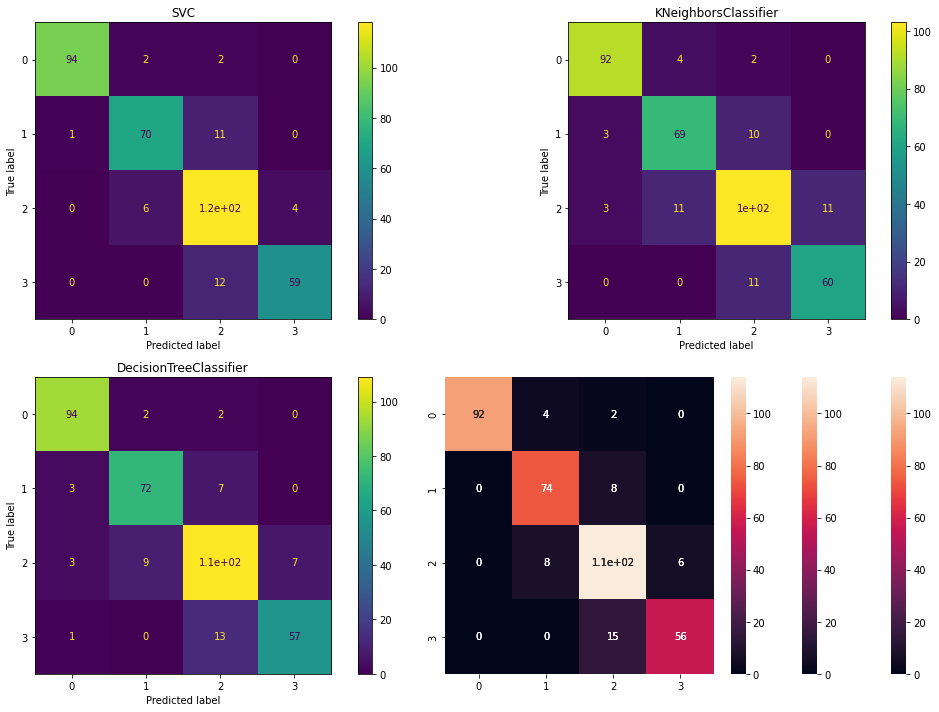

In [ ]:
#ploting confusion matrix for each model for comapring assistant
fig, axes = plt.subplots(nrows=2, ncols=2, figsize=(15,10))
for cls, ax in zip(classifiers, axes.flatten()):
    plot_confusion_matrix(cls, 
                          x_test, 
                          y_test, 
                          ax=ax, 
                           )
    ax.title.set_text(type(cls).__name__)
    dnn_matrix=metrics.confusion_matrix(y_test,np.argmax(pred,-1))
    sns.heatmap(dnn_matrix, annot=True )
plt.tight_layout()  
plt.show()

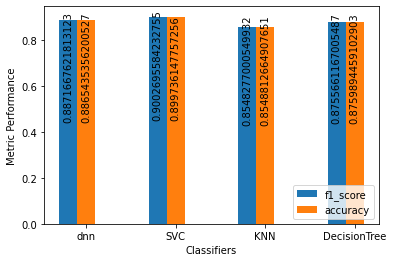

In [ ]:
#presenting accuracy and f1 score for comparing finishing and choosing the best model
estimators=['dnn','SVC','KNN','DecisionTree']
fig, ax = plt.subplots()
width=0.2
bar_plot1 = ax.bar(np.arange(len(estimators)),f1,width,tick_label=estimators)
bar_plot2 = ax.bar(np.arange(len(estimators))+width,acc,width,tick_label=estimators)

ax.set_xlabel('Classifiers')
ax.set_ylabel('Metric Performance')
ax.legend(('f1_score','accuracy'),loc='lower right')

def autolabel(rects):
    for rect in rects:
        height = rect.get_height()
        ax.text(rect.get_x() + rect.get_width()/2., 0.5*height,height,ha='center', va='bottom', rotation=90)
autolabel(bar_plot1)
autolabel(bar_plot2)
plt.show()

**BY COMAPRING PRECISION/RECALL DATAFRAME , MODELS CONFUSION MATRECIS AND BARS CHART PLOT .. WE CAN ASSUME THAT SUPPORT VECTOR MACHINE IS THE BEST MODEL TO TRAIN THIS DATASET**